In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

**Dataset Import**


In [3]:
#import library for dataset
import pandas as pd

In [4]:
dataset=pd.read_csv('/content/drive/MyDrive/Ml Datas/BIKE DETAILS.csv')
dataset.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


**1061 Rows and 7 column ...this is the shape**

In [5]:
dataset.shape

(1061, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


# Data Preprocessing

In [7]:
# To check if any garbage value has in the column
dataset['year'].unique()

#No garbage data found******


array([2019, 2017, 2018, 2015, 2011, 2010, 2008, 2016, 2020, 2012, 2006,
       2013, 2009, 2014, 2004, 2007, 2000, 2002, 2005, 1997, 2001, 1988,
       1999, 1998, 1991, 2003, 1993, 1995])

**This is selected Column For My Project which is predict Selling Price On The basis of other column**

In [8]:
df = dataset[[ 'km_driven', 'ex_showroom_price','year','selling_price']]
df

,km_driven,ex_showroom_price,year,selling_price
0,350,NaN,2019,175000
1,5650,NaN,2017,45000
2,12000,148114.0,2018,150000
3,23000,89643.0,2015,65000
4,21000,NaN,2011,20000
...,...,...,...,...
1056,500000,52000.0,2010,17000
1057,33000,51000.0,2012,16000
1058,35000,57000.0,2013,15000
1059,53000,58000.0,2009,12000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_driven          1061 non-null   int64  
 1   ex_showroom_price  626 non-null    float64
 2   year               1061 non-null   int64  
 3   selling_price      1061 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 33.3 KB


# **Checking Null Value on selected Column**

In [10]:
df.isnull().sum()

#Ex_showroom_Price has Null Value

km_driven              0
ex_showroom_price    435
year                   0
selling_price          0
dtype: int64

**Cleaning**

# **Clearing The nAN Value**

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 2 to 1060
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_driven          626 non-null    int64  
 1   ex_showroom_price  626 non-null    float64
 2   year               626 non-null    int64  
 3   selling_price      626 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.5 KB


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Visualization')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Here X1 X2 X3 is the input feature and Y is output**

In [12]:
x1 = df['km_driven'].values
x2 = df['ex_showroom_price'].values
x3 = df['year'].values
y=df['selling_price'].values

In [13]:
print(x1)
print(x2)
print(x2)
print(y)

[ 12000  23000  60000  17000  42000  32000  10000  21178   1127  55000
  45000  23000  39000  17450  20696  35000  24000  35000   2500  75000
  50000  10000   6502  21000  16000  20000  81000   8000  55000  57000
  26000  13000  29000  43000  40000  24000   3000  55000  24000  80000
  39000  20000  30000  41000   8000   1933  15856   3700  32000   3500
   9000  38000  20000  22000   9432  43000 500000  30514 130000  25000
   2500  35000  16500  35000  20000   9000  38000   6465  24000   7000
   6100  14000  85000  10000  40000  30000   3000  55000  12000    500
  50000  25000  26000  18000  18000  35000  16000  99000  52000  45000
  27000  15000  25000  50000  17450  32000  38000  71000  50000  30000
  15888  26000  41000 100000   6000  80000  46000  11000  50000  50000
  67000  15500  45000  60855  37714  60000  26000  30000  34601  48000
  60000  16000  20000  17500  30000  10000  40000  21000  50000  32800
  32000   3900  10000   8000  11000  51000  45000  66000  41000  15000
  2000


# **Parameter Initialization** : `1+NF`

*   Here 1= base
*  nf=number of feature

So My Feature input is 3 thats why theta will be `theta=1,theta=1, theta=1,theta=1`
*




In [15]:
theta = [1, 1, 1, 1]
print(theta[0])
print(theta[1])
print(theta[2])
print(theta[3])

1
1
1
1


Now calculate the 



1.   Hypothesis Function
2.   Cost Function
1.   Gradient Descent








In [17]:
count = 0

for i in range(10):

    # Hypothesis Function
    
    print("Iteration number: ", count+1)
    count = count+1

    m = len(x1)
    h = []

    for i in range(m): 
        h.append(theta[0]+theta[1]*x1[i]+theta[2]*x2[i]+theta[3]*x3[i])

    print("Hypothesis Function is: ", h)   


    # Cost Function

    error = 0

    for i in range(m): 
        error = error + (h[i]-y[i])**2
        # print((h[i]-y[i])**2)
    # print(error)
    J = (1/(2*m))*error    

    print("Cost Function is: ", J) 


    # Gradient Descent

    sum0 = 0   
    sum1 = 0
    sum2 = 0
    sum3 = 0
    alpha = 0.00001

    for i in range(m):
        sum0 = sum0 + (h[i]-y[i])
        sum1 = sum1 + (h[i]-y[i])*x1[i]
        sum2 = sum2 + (h[i]-y[i])*x2[i]
        sum3 = sum3 + (h[i]-y[i])*x3[i]

    theta[0] = theta[0] - (alpha/m)*sum0   
    theta[1] = theta[1] - (alpha/m)*sum1
    theta[2] = theta[2] - (alpha/m)*sum2
    theta[3] = theta[3] - (alpha/m)*sum3     

    print("Updated Parameters are: ", theta)

Iteration number:  1
Hypothesis Function is:  [2.7548715761665257e+56, 1.7306458355515167e+56, 1.225189378870156e+56, 1.6714269652360855e+56, 1.267464472477857e+56, 1.5670197719583686e+56, 9.040174786504243e+55, 1.8386675492841862e+56, 6.430690163751328e+56, 1.2865707702023327e+56, 2.3356538290378537e+56, 2.798991654393356e+56, 2.581166039960014e+56, 8.815330673918336e+55, 1.068330733650724e+56, 1.166758394511201e+56, 9.078048139954984e+55, 1.6893928131212215e+56, 1.136038607944154e+56, 1.7526440617330188e+56, 1.632602274333985e+56, 1.3387671143811657e+56, 1.0782194044894683e+56, 1.2102408031669662e+56, 3.7611497397803733e+56, 1.3807214389647285e+56, 1.36227817394446e+56, 1.5681449040523806e+56, 1.4955231017124914e+56, 1.327626988126e+56, 1.5429528018776016e+56, 1.1460689536194582e+56, 1.554986286917985e+56, 9.56055312444585e+55, 1.5022871294261467e+56, 1.0084978249325932e+56, 1.0982495203246841e+56, 1.2725934201533037e+56, 1.0467580668057265e+56, 1.7894720028549644e+56, 1.154628348300

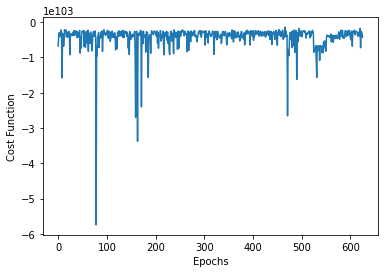

In [40]:
import matplotlib.pyplot as plt
x= [i for i in range(0,626)]
plt.plot(x, h)
plt.xlabel('Epochs')
# Naming The Y Axis
plt.ylabel('Cost Function')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


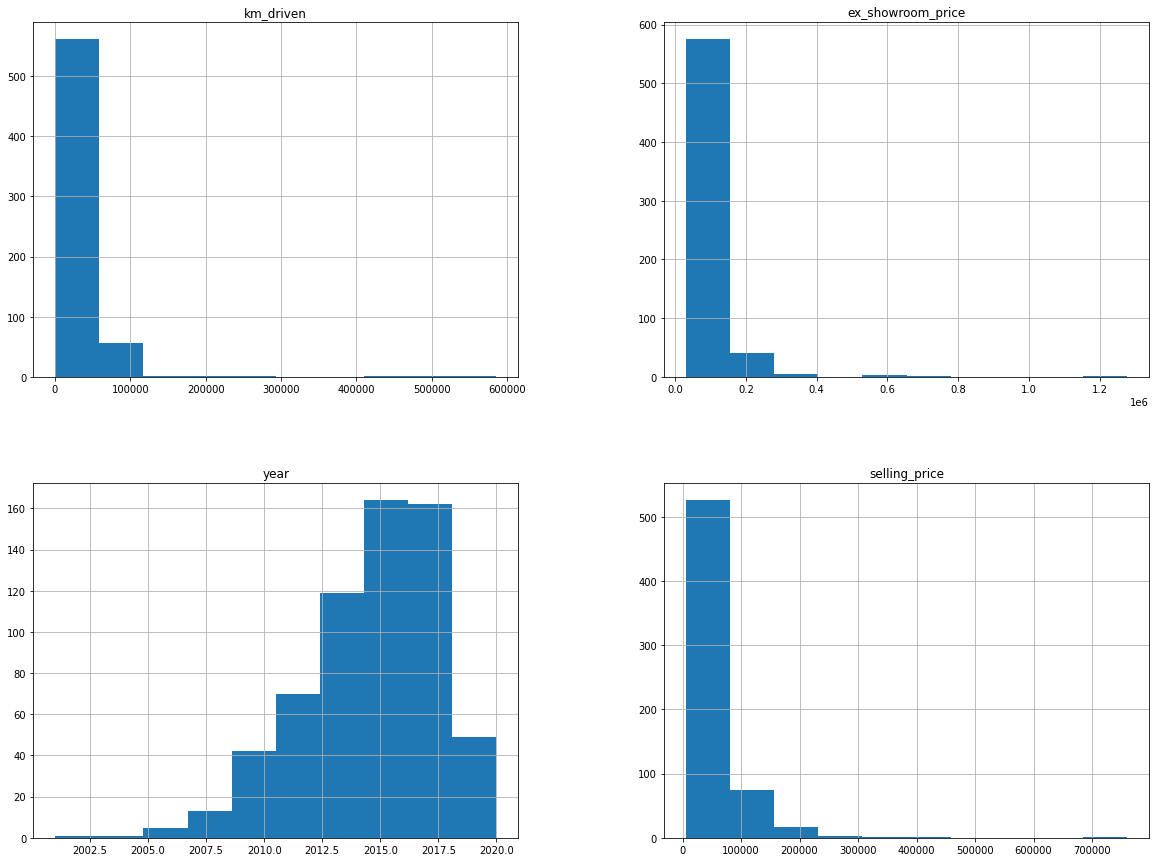

In [41]:
#Display Plot 
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

# **Now implementing with Sklearn**

In [ ]:
newdf=pd.read_csv('/content/drive/MyDrive/Ml Datas/BIKE DETAILS.csv')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
newdf = newdf[['km_driven', 'ex_showroom_price','year','selling_price']]
newdf.dropna(inplace=True)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 2 to 1060
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   km_driven          626 non-null    int64  
 1   ex_showroom_price  626 non-null    float64
 2   year               626 non-null    int64  
 3   selling_price      626 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.5 KB


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
X = newdf[['km_driven', 'ex_showroom_price','year']]
y = newdf['selling_price']
print(y)

2       150000
3        65000
5        18000
6        78500
9        50000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 626, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_test)

126

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pre = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pre)

216618947.10580584